In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5, dtype='int')

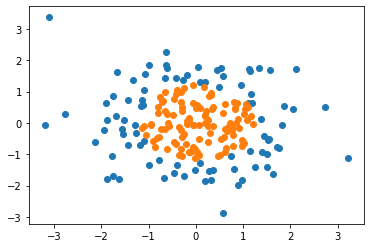

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 使用逻辑回归

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

class LogisticRegression:
    
    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.interception_ = None
        self._theta = None
    
    def _sigmoid(self, t):
            return 1. / (1. + np.exp(-t))
        
    def fit(self, X_train, y_train, eta=0.01, n_iters = 1e4):
        """根据训练数据集X_train, y_train，使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must be equal to the size of y_train"
        

        
        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
            except:
                return float('inf')
            
        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta))-y) / len(X_b)
        
        def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                i_iter += 1
            return theta
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
        
    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must equal to X_train"
        
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must equal to X_train"
        
        proba = self.predict_proba(X_predict)
        return np.array(proba>=0.5, dtype=int)
    
    def score(self, X_test, y_test):
        """根据测试数据集X_test, y_test确定当前模型的准确度"""
        
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)
        
    def __repr__(self):
        return "LogisticRegression()"

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [14]:
log_reg.score(X, y)

0.605

In [15]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

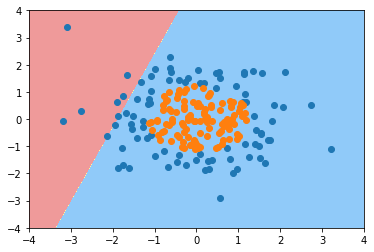

In [17]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())   # 遵循sklearn标准构建的类可以无缝结合到管道中
    ])

In [21]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [22]:
poly_log_reg.score(X, y)

0.95

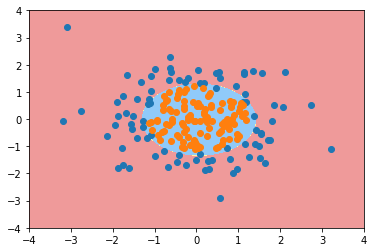

In [23]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [24]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

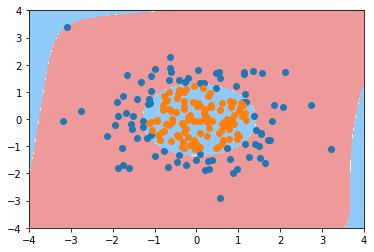

In [25]:
plot_decision_boundary(poly_log_reg2, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()